In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [11]:
# Load your dataset
data = pd.read_csv(r'C:\Users\User\Downloads\updated_learner_attrition_data_2017_2024.csv')

In [13]:
# Display info about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               30000 non-null  int64  
 1   Date                    30000 non-null  object 
 2   Age_Group               30000 non-null  object 
 3   Gender                  30000 non-null  object 
 4   Region                  30000 non-null  object 
 5   Household_Income        30000 non-null  object 
 6   Access_to_Technology    30000 non-null  object 
 7   Employment_Status       30000 non-null  object 
 8   KCSE_Grade              30000 non-null  object 
 9   Assessments_Submitted   30000 non-null  int64  
 10  Assessment_Score        30000 non-null  int64  
 11  Learning_Adaptability   30000 non-null  object 
 12  Logins_Per_Week         30000 non-null  int64  
 13  Time_Spent_Weekly       30000 non-null  int64  
 14  Forum_Participation     30000 non-null

In [15]:
data = data.drop(["Unnamed: 19", "Unnamed: 20"], axis=1) 

In [17]:
data.head()

,Record_ID,Date,Age_Group,Gender,Region,Household_Income,Access_to_Technology,Employment_Status,KCSE_Grade,Assessments_Submitted,Assessment_Score,Learning_Adaptability,Logins_Per_Week,Time_Spent_Weekly,Forum_Participation,Emails_Sent_Weekly,Support_Services_Usage,Psychosocial_Support,Attrition_Status
0,1,01/01/2020,25-34,Male,Suburban,High,No,Unemployed,E,8,55,Low,6,1,1,1,Yes,Low,Continued
1,2,04/08/2018,18-24,Male,Rural,Middle,Yes,Full-time,D-,12,70,High,7,3,2,2,Yes,Low,Continued
2,3,08/09/2017,25-34,Female,Urban,High,No,Full-time,B-,12,40,Moderate,6,2,5,3,No,High,Completion
3,4,08/03/2021,18-24,Male,Urban,High,Yes,Full-time,D-,15,41,Low,4,2,2,4,Yes,High,Dropout
4,5,09/04/2022,25-34,Female,Urban,High,Yes,Part-time,E,10,81,Low,5,10,4,0,No,Low,Dropout


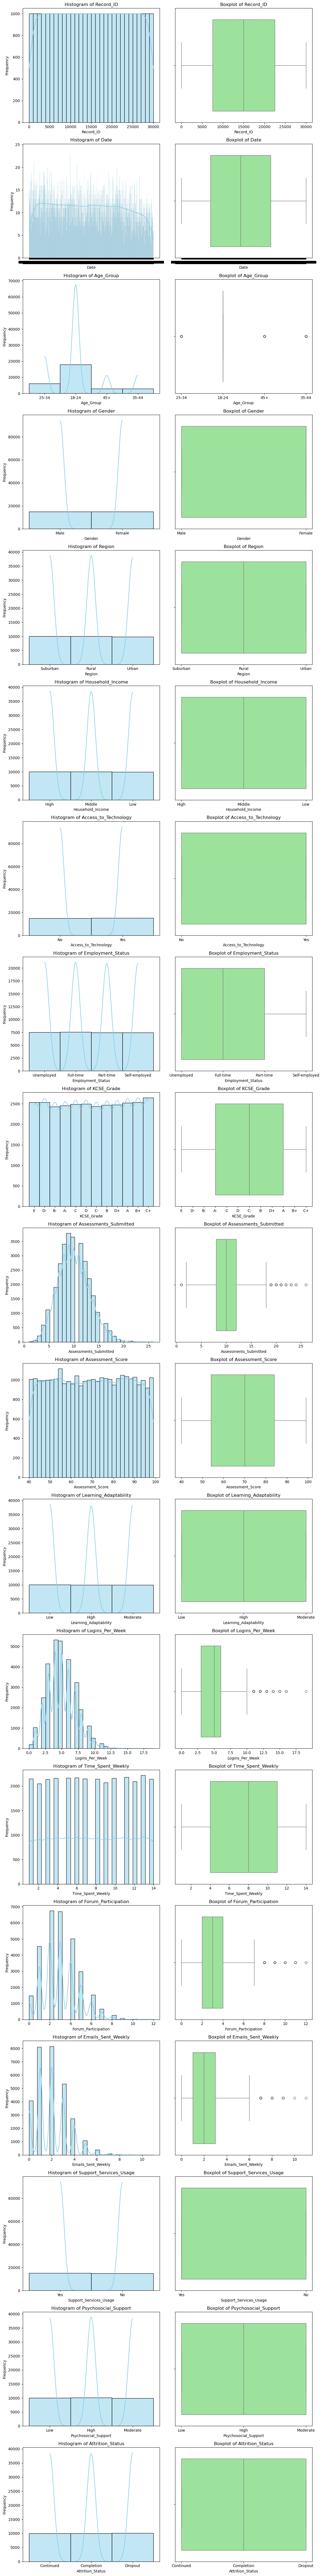

In [19]:
# Set the number of rows to match the number of columns in df
num_cols = len(data.columns)
fig, axes = plt.subplots(nrows=num_cols, ncols=2, figsize=(12, 5 * num_cols))

for idx, column in enumerate(data.columns):
    # Histogram on the left (column 0)
    sns.histplot(data[column], kde=True, bins=30, ax=axes[idx, 0], color='skyblue')
    axes[idx, 0].set_title(f"Histogram of {column}")
    axes[idx, 0].set_xlabel(column)
    axes[idx, 0].set_ylabel("Frequency")
    
    # Boxplot on the right (column 1)
    sns.boxplot(x=data[column], ax=axes[idx, 1], color='lightgreen')
    axes[idx, 1].set_title(f"Boxplot of {column}")
    axes[idx, 1].set_xlabel(column)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [ ]:
#2.	Handle Missing Values & Feature Engineering

In [25]:
#Check for missing Values
data.isnull().sum()

Record_ID                 0
Date                      0
Age_Group                 0
Gender                    0
Region                    0
Household_Income          0
Access_to_Technology      0
Employment_Status         0
KCSE_Grade                0
Assessments_Submitted     0
Assessment_Score          0
Learning_Adaptability     0
Logins_Per_Week           0
Time_Spent_Weekly         0
Forum_Participation       0
Emails_Sent_Weekly        0
Support_Services_Usage    0
Psychosocial_Support      0
Attrition_Status          0
dtype: int64

In [ ]:
# Feature Extraction

In [31]:
data['Average_Time_Per_Login'] = data['Time_Spent_Weekly'] / (data['Logins_Per_Week'].replace(0, np.nan) + 1e-6)
data['Assessment_Efficiency'] = data['Assessment_Score'] / (data['Time_Spent_Weekly'].replace(0, np.nan) + 1e-6)
data['Academic_Engagement_Score'] = data['Assessments_Submitted'] + data["Assessment_Score"]

In [33]:
data.head()

,Record_ID,Date,Age_Group,Gender,Region,Household_Income,Access_to_Technology,Employment_Status,KCSE_Grade,Assessments_Submitted,...,Logins_Per_Week,Time_Spent_Weekly,Forum_Participation,Emails_Sent_Weekly,Support_Services_Usage,Psychosocial_Support,Attrition_Status,Average_Time_Per_Login,Assessment_Efficiency,Academic_Engagement_Score
0,1,01/01/2020,25-34,Male,Suburban,High,No,Unemployed,E,8,...,6,1,1,1,Yes,Low,Continued,0.166667,54.999945,63
1,2,04/08/2018,18-24,Male,Rural,Middle,Yes,Full-time,D-,12,...,7,3,2,2,Yes,Low,Continued,0.428571,23.333326,82
2,3,08/09/2017,25-34,Female,Urban,High,No,Full-time,B-,12,...,6,2,5,3,No,High,Completion,0.333333,19.999990,52
3,4,08/03/2021,18-24,Male,Urban,High,Yes,Full-time,D-,15,...,4,2,2,4,Yes,High,Dropout,0.500000,20.499990,56
4,5,09/04/2022,25-34,Female,Urban,High,Yes,Part-time,E,10,...,5,10,4,0,No,Low,Dropout,2.000000,8.099999,91


In [35]:
#	Encode Categorical Variables

# Ordinal columns with specified order
ordinal_mapping = {
    'Age_Group': ['18-24', '25-34', '35-44', '45+'],
    'Household_Income': ['Low', 'Middle', 'High'],
    'KCSE_Grade': ['E', 'D-', 'D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A'],
    'Learning_Adaptability': ['Low', 'Moderate', 'High'],
    'Psychosocial_Support': ['Low', 'Moderate', 'High']
}

# Convert ordinal columns to numerical codes
for col, order in ordinal_mapping.items():
    data[col] = data[col].astype('category').cat.set_categories(order, ordered=True).cat.codes

# Binary columns encoding
binary_mapping = {
    'Gender': {'Male': 0, 'Female': 1},
    'Access_to_Technology': {'No': 0, 'Yes': 1},
    'Support_Services_Usage': {'No': 0, 'Yes': 1}
}

# Apply binary encoding
for col, mapping in binary_mapping.items():
    data[col] = data[col].map(mapping)

# One-hot encode nominal categories
nominal_cols = ['Region', 'Employment_Status', 'Attrition_Status']
data = pd.get_dummies(data, columns=nominal_cols, drop_first=False)

# Display first few rows of transformed data
data.head()

,Record_ID,Date,Age_Group,Gender,Household_Income,Access_to_Technology,KCSE_Grade,Assessments_Submitted,Assessment_Score,Learning_Adaptability,...,Region_Rural,Region_Suburban,Region_Urban,Employment_Status_Full-time,Employment_Status_Part-time,Employment_Status_Self-employed,Employment_Status_Unemployed,Attrition_Status_Completion,Attrition_Status_Continued,Attrition_Status_Dropout
0,1,01/01/2020,1,0,2,0,0,8,55,0,...,False,True,False,False,False,False,True,False,True,False
1,2,04/08/2018,0,0,1,1,1,12,70,2,...,True,False,False,True,False,False,False,False,True,False
2,3,08/09/2017,1,1,2,0,7,12,40,1,...,False,False,True,True,False,False,False,True,False,False
3,4,08/03/2021,0,0,2,1,1,15,41,0,...,False,False,True,True,False,False,False,False,False,True
4,5,09/04/2022,1,1,2,1,0,10,81,0,...,False,False,True,False,True,False,False,False,False,True


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Record_ID                        30000 non-null  int64  
 1   Date                             30000 non-null  object 
 2   Age_Group                        30000 non-null  int8   
 3   Gender                           30000 non-null  int64  
 4   Household_Income                 30000 non-null  int8   
 5   Access_to_Technology             30000 non-null  int64  
 6   KCSE_Grade                       30000 non-null  int8   
 7   Assessments_Submitted            30000 non-null  int64  
 8   Assessment_Score                 30000 non-null  int64  
 9   Learning_Adaptability            30000 non-null  int8   
 10  Logins_Per_Week                  30000 non-null  int64  
 11  Time_Spent_Weekly                30000 non-null  int64  
 12  Forum_Participatio

In [39]:
# First convert boolean columns to integers (for neural network compatibility)
bool_cols = ['Region_Rural', 'Region_Suburban', 'Region_Urban',
             'Employment_Status_Full-time', 'Employment_Status_Part-time',
             'Employment_Status_Self-employed', 'Employment_Status_Unemployed',
             'Attrition_Status_Completion', 'Attrition_Status_Continued',
             'Attrition_Status_Dropout']

data[bool_cols] = data[bool_cols].astype(int)

# Create target variable (convert one-hot back to categorical)
# We'll use Continued (0), Completion (1), Dropout (2)
attrition_map = {
    'Attrition_Status_Completion': 1,
    'Attrition_Status_Continued': 0,
    'Attrition_Status_Dropout': 2
}

# Find which column has value 1 for each row
y = data[['Attrition_Status_Completion', 
          'Attrition_Status_Continued',
          'Attrition_Status_Dropout']].idxmax(axis=1).map(attrition_map)

# Drop all Attrition Status columns from features
X = data.drop(columns=['Attrition_Status_Completion',
                       'Attrition_Status_Continued',
                       'Attrition_Status_Dropout',
                       'Record_ID',
                      'Date'])  #Remove record id    # Remove date column 

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # Important for imbalanced classes
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training shape:", X_train_scaled.shape)
print("Test shape:", X_test_scaled.shape)

Training shape: (24000, 24)
Test shape: (6000, 24)


In [41]:
# Identify feature types
binary_features = ['Gender', 'Access_to_Technology', 'Support_Services_Usage',
                   'Region_Rural', 'Region_Suburban', 'Region_Urban',
                   'Employment_Status_Full-time', 'Employment_Status_Part-time',
                   'Employment_Status_Self-employed', 'Employment_Status_Unemployed']

ordinal_numerical = ['Age_Group', 'Household_Income', 'KCSE_Grade', 
                    'Learning_Adaptability', 'Psychosocial_Support',
                    'Assessments_Submitted', 'Assessment_Score',
                    'Logins_Per_Week', 'Time_Spent_Weekly',
                    'Forum_Participation', 'Emails_Sent_Weekly', 'Average_Time_Per_Login',
                    'Assessment_Efficiency', 'Academic_Engagement_Score' ]

# Create separate scaler for numericals
scaler = StandardScaler()

# Scale only ordinal/numerical features
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[ordinal_numerical] = scaler.fit_transform(X_train[ordinal_numerical])
X_test_scaled[ordinal_numerical] = scaler.transform(X_test[ordinal_numerical])

# Binary features remain unchanged (0/1 values)

In [43]:
import xgboost as xgb
from sklearn.metrics import classification_report

# Initialize model WITH early_stopping_rounds
xgb_model = xgb.XGBClassifier(
    #objective='multi:softmax',
    #num_class=3,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    #early_stopping_rounds=20,  # Moved HERE from fit()
    #subsample=0.8,
    random_state=42
)

# Train with eval_set in fit()
xgb_model.fit(
    X_train, 
    y_train,
    eval_set=[(X_test, y_test)],  # Validation data
    verbose=False  # Turn off training logs
)

# Evaluation remains the same
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.30      0.31      1989
           1       0.33      0.32      0.32      1999
           2       0.33      0.37      0.35      2012

    accuracy                           0.33      6000
   macro avg       0.33      0.33      0.33      6000
weighted avg       0.33      0.33      0.33      6000



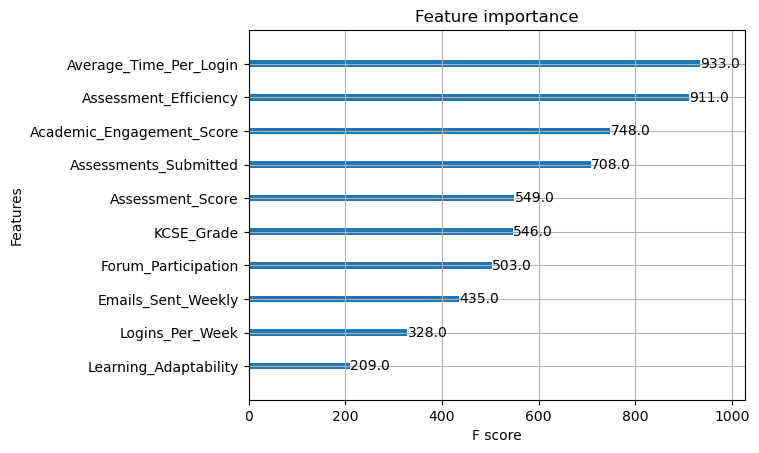

In [49]:
from xgboost import plot_importance
plot_importance(xgb_model, max_num_features=10)
plt.show()

In [47]:
#Random Forest Baseline
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.32      0.36      0.34      1989
           1       0.32      0.30      0.31      1999
           2       0.32      0.32      0.32      2012

    accuracy                           0.32      6000
   macro avg       0.32      0.32      0.32      6000
weighted avg       0.32      0.32      0.32      6000

